In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [18]:
training_x_segments = np.load('norwegian_train_x.npy')
training_y_segments = np.load('norwegian_train_y.npy')
testing_x_segments = np.load('norwegian_test_x.npy')
testing_y_segments = np.load('norwegian_test_y.npy')

In [19]:
X_train, y_train = np.array(training_x_segments), np.array(training_y_segments)


X_test, y_test = np.array(testing_x_segments), np.array(testing_y_segments)
    
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1)
#X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(120280, 128, 10, 1)
(120280,)
(27249, 128, 10, 1)


In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 10, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 8, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 4, 32)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 8064)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                516160    
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 516,545
Trainable params: 516,545
Non-trainable params: 0
________________________________________________

In [21]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.0001),
              metrics='accuracy')
              
history = model.fit(X_train, y_train, epochs=50)

Epoch 1/50
3759/3759 [==============================] - 28s 7ms/step - loss: 2.9711 - accuracy: 0.7129
Epoch 2/50
3759/3759 [==============================] - 29s 8ms/step - loss: 1.5042 - accuracy: 0.8268
Epoch 3/50
3759/3759 [==============================] - 29s 8ms/step - loss: 1.1104 - accuracy: 0.8656
Epoch 4/50
3759/3759 [==============================] - 29s 8ms/step - loss: 0.9440 - accuracy: 0.8870
Epoch 5/50
3759/3759 [==============================] - 29s 8ms/step - loss: 0.8722 - accuracy: 0.8960
Epoch 6/50
3759/3759 [==============================] - 29s 8ms/step - loss: 0.8359 - accuracy: 0.9027
Epoch 7/50
3759/3759 [==============================] - 29s 8ms/step - loss: 0.8090 - accuracy: 0.9082
Epoch 8/50
3759/3759 [==============================] - 29s 8ms/step - loss: 0.7862 - accuracy: 0.9126
Epoch 9/50
3759/3759 [==============================] - 28s 8ms/step - loss: 0.7736 - accuracy: 0.9141
Epoch 10/50
3759/3759 [==============================] - 28s 8ms/step - l

In [22]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

852/852 - 2s - loss: 3.9563 - accuracy: 0.7022 - 2s/epoch - 2ms/step


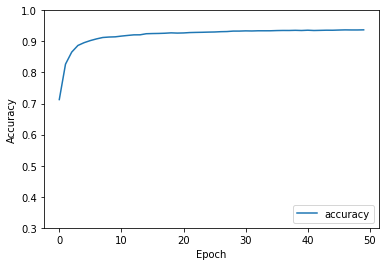

In [23]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1])
plt.legend(loc='lower right')